# PAPER GRAPHICS

### Loading and reading the JSON file

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

data = './lod-data.json'

final_data = pd.read_json(data, orient='index')

### Graph of the distribution of domains in the Linked Open Data Cloud 

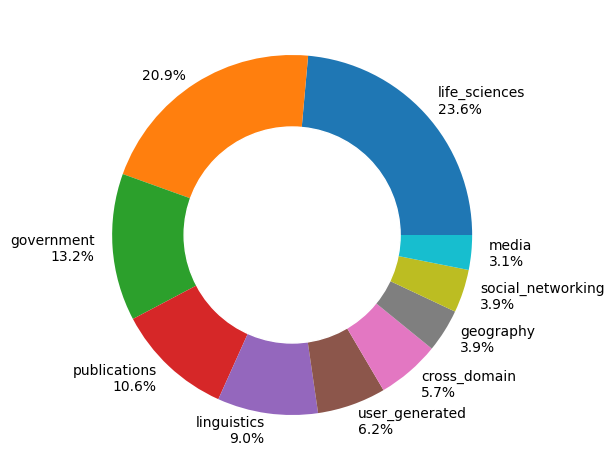

In [2]:
lista = final_data['domain'].unique().tolist()

lista.pop(3)

list_domains = []
for i in range (0, len(lista)):
    domain = final_data.loc[final_data.loc[:, 'domain'] == lista[i]]
    list_domains.append(len((domain)))    

total = 0
for num in list_domains:
    total += num

list_percentages = []
for num in range(0,len(list_domains)): 
    percentage = (list_domains[num]*100)/total
    percentage = round(percentage,1)
    percentage = str(percentage)
    perct = percentage + "%"
    list_percentages.append(perct)
    lista[num] = lista[num] + "\n" 
    lista[num] = lista[num] + perct
    

domain_percentage = pd.DataFrame(list(zip(lista,list_percentages,list_domains)), columns = ['Domain','Percentage','Count'])
percentage_order = domain_percentage.sort_values('Count',ascending=False)

plt.pie(percentage_order.loc[:,'Count'], labels = percentage_order.loc[:,'Domain'], labeldistance=1.1)

my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout() 
plt.savefig("DomainDistribution.png", dpi=199)

### Graph on the number of SPARQL Endoints per repository 

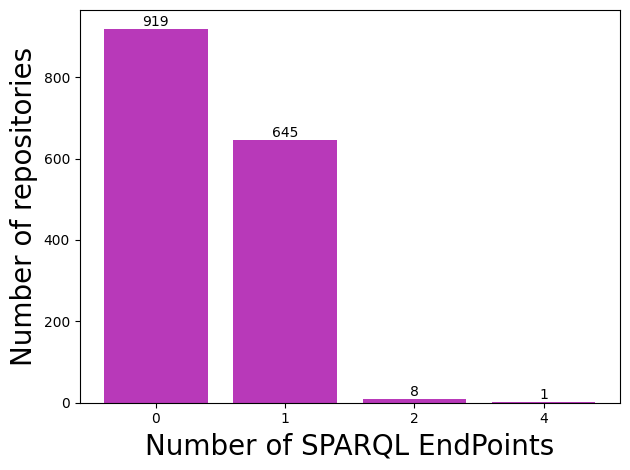

In [31]:
sparql = final_data.loc[:,"sparql"]

list_sparql = []

for i in range(0,len(sparql)):
    element = str(sparql[i])
    endpoints = element.count('title')
    list_sparql.append(str(endpoints))

unique_list_sparql = list(dict.fromkeys(list_sparql))
unique_list_sparql.sort()

list_frequency = []

for num in unique_list_sparql:
    frequency = list_sparql.count(num)
    list_frequency.append(frequency)

plt.bar(unique_list_sparql, list_frequency, color = '#B839B9')

for index, value in enumerate(list_frequency): 
    plt.text(index, value, 
             str(value), horizontalalignment= 'center', verticalalignment='bottom')
    
plt.xlabel('Number of SPARQL EndPoints', fontsize = 20)
plt.ylabel('Number of repositories', fontsize = 20)

plt.tight_layout() 
plt.savefig("SPARQLEndpoints.png", dpi=199)

### Graph on the proportion of accessibility problems in Life Sciences repositories in the LOD.

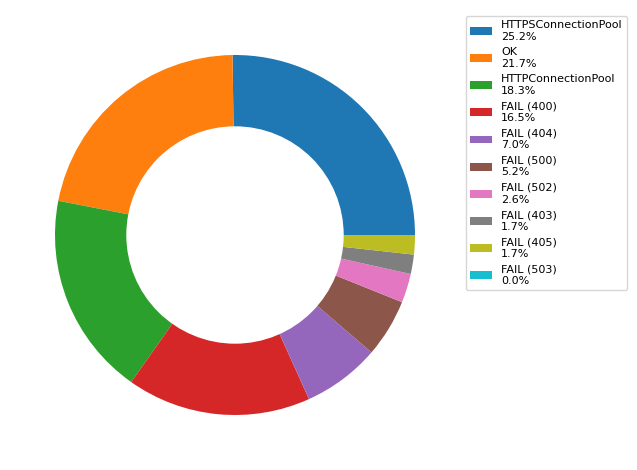

In [24]:
life_sciences_repositories = final_data.loc[final_data.loc[:, 'domain'] == "life_sciences"]

repositories_sparql = life_sciences_repositories.loc[:, 'sparql']

def notNull(lista):
    lista_sin_null = []
    for i in range(0, len(lista)):
        if lista[i] != []:
            lista_sin_null.append(lista[i])
    return lista_sin_null

lista_sparql = notNull(repositories_sparql)

lista_fails = []
for elemento in lista_sparql:
    for diccionario in elemento: 
        lista_fails.append(diccionario["status"])
        
unique_list_fails = list(dict.fromkeys(lista_fails))

fails = ["OK", "FAIL (400)", "FAIL (403)", "FAIL (404)", "FAIL (405)", "FAIL (500)", "FAIL (502)", "FAIL (503)", "HTTPConnectionPool", "HTTPSConnectionPool"]

count_fails_total = []
for fail in fails: 
    count_fails = 0
    for element in lista_fails: 
        if element.count(fail) == 1:
            count_fails += 1
    count_fails_total.append(count_fails)

total = 0
for num in count_fails_total:
    total += num
    
list_percentages = []
for num in range(0,len(count_fails_total)): 
    percentage = (count_fails_total[num]*100)/total
    percentage = round(percentage,1)
    percentage = str(percentage)
    perct = percentage + "%"
    list_percentages.append(perct)
    fails[num] = fails[num] + "\n" 
    fails[num] = fails[num] + perct

fails_sparql = pd.DataFrame(list(zip(fails,count_fails_total,list_percentages)), columns = ['Fail','Count','Percentage'])
percentage_order = fails_sparql.sort_values('Count',ascending=False)

plt.pie(percentage_order.loc[:,'Count'], labeldistance=1.1)
plt.legend(labels = percentage_order.loc[:,'Fail'], loc="upper left", fontsize = 8, bbox_to_anchor=(1.0, 1.0))

my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.tight_layout() 
plt.savefig("ProportionAccess.png", dpi=199)

### Quantitative results of the analysis

In [26]:
import plotly.graph_objects as go

titles = ['Dimension', '# of repositories', '% of repositories']

dimension = ['LOD Cloud', 'SPARQL EndPoints', 'SPARQL EndPoints with OK status', 'Life Sciences in LOD Cloud', 'SPARQL EndPoints in Life Sciences', 'SPARQL EndPoints in Life Sciences with OK status']

def numSPARQL(sparql_list):
    list_sparql = []
    for i in range(0,len(sparql_list)):
        element = str(sparql_list[i])
        endpoints = element.count('title')
        list_sparql.append(str(endpoints))
    return list_sparql

def freqSPARQL(list_num_sparql, unique_list):
    list_frequency = []
    for num in unique_list:
        frequency = list_num_sparql.count(num)
        list_frequency.append(frequency)
    return list_frequency

def notNull(lista):
    lista_sin_null = []
    for i in range(0, len(lista)):
        if lista[i] != []:
            lista_sin_null.append(lista[i])
    return lista_sin_null

def contOK(lista):
    cnt = 0
    for element in lista:
        if element[0]['status'] == "OK":
            cnt += 1
    return cnt

def listPercentage(lista):
    list_final = []
    for percentage in lista:
        percentage = round(percentage,1)
        percentage = str(percentage)
        perct = percentage + "%"
        list_final.append(perct)
    return list_final


num_repositories = len(final_data)
final_info = [num_repositories]

sparql = final_data.loc[:,"sparql"]
total_list_sparql  = numSPARQL(sparql)
unique_list_sparql = list(dict.fromkeys(total_list_sparql))
unique_list_sparql.remove('0')
total_list_frequency = freqSPARQL(total_list_sparql, unique_list_sparql)
final_info.append(sum(total_list_frequency))

total_sparql_notNull = notNull(sparql)
total_sparql_with_OK = contOK(total_sparql_notNull)
final_info.append(total_sparql_with_OK)

life_sciences_repositories = final_data.loc[final_data.loc[:, 'domain'] == "life_sciences"]
num_repositories_life = len(life_sciences_repositories)
final_info.append(num_repositories_life)

life_sciences_sparql = life_sciences_repositories.loc[:, 'sparql']
life_list_sparql = numSPARQL(life_sciences_sparql)
unique_list_sparql_life = list(dict.fromkeys(life_list_sparql))
unique_list_sparql_life.remove('0')
life_list_frequency = freqSPARQL(life_list_sparql, unique_list_sparql_life)
final_info.append(sum(life_list_frequency))

life_sparql_notNull = notNull(life_sciences_sparql)
life_sparql_with_OK = contOK(life_sparql_notNull)
final_info.append(life_sparql_with_OK)

percentage_list = [(final_info[0]*100)/num_repositories]
percentage_list.append((final_info[1]*100)/num_repositories)
percentage_list.append((final_info[2]*100)/final_info[1])
percentage_list.append((final_info[3]*100)/num_repositories)
percentage_list.append((final_info[4]*100)/final_info[3])
percentage_list.append((final_info[5]*100)/final_info[4])
    
percentage_list_final = listPercentage(percentage_list)

fig = go.Figure(data=[go.Table(columnwidth = [1000,400], header=dict(values=titles, line_color='darkslategray', fill_color = 'lightgray', font=dict(color='black', size=12)),
                cells=dict(values=[dimension, final_info, percentage_list_final], line_color='darkslategray', fill_color = 'whitesmoke', align='center', font=dict(color='black', size=12), height = 30))
                   ])

fig.write_image("QuantitaveResults.png")

### Life Sciences related repositories 

In [7]:
import json

with open('lod-data.json') as f:
    data = json.load(f)

datos = []

for documento in data.values():
    if documento.get("domain") == "life_sciences":
        identificador = documento.get("identifier")
        titulo = documento.get("title")
        sparql = documento.get("sparql", [{}])
        if sparql:
            status = sparql[0].get("status")
            access_url = sparql[0].get("access_url")
        else:
            status = None
            access_url = None
        datos.append([identificador, titulo, status, access_url])
    
df = pd.DataFrame(datos, columns=["identificador", "title", "status", "access_url"])
df = df.dropna()
df.to_excel("life_science_data.xlsx", index=False)